In [2]:
#zheng68k 
import pickle
gene_list=pickle.load(open("human/gene_2903.list","rb"))

TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))
gene_TF_dict=pickle.load(open("human/gene_TF_dict","rb"))

gene_dict=pickle.load(open("human/gene_dict","rb"))


In [7]:
#prepare GO  term
GO_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=30:
        count+=1
        GO_list.append(item)
print(count)

gene_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)

1946


In [10]:
#sparse
"""
1219661
1226748
1234154
1240193
1246323
1251401
1255899
1260443
1264380
"""

for x in [200,400,600,800,1000,1200,1400,1600,1800]:
     #####################################################################
    count=0
    for i,gene_id in enumerate(gene_list):
        for j,TF in enumerate(TF_gene_dict):
            if TF in gene_TF_dict.get(gene_id,[]):
                count+=1
            else:
                pass
    print(count)
    parameters_gene_to_TF=count
     ####################################################################
    count=0

    for i,gene_id in enumerate(gene_list):
    
        for j,GO_term in enumerate(GO_list[0:x]):
            if GO_term in gene_dict.get(gene_id,"GO:default"):
    
                count+=1
            else:
                pass
    print(count)
    parameters_gene_to_GO=count
    #########################################################################
    count=0
    for i,TF in enumerate(TF_gene_dict):
         for j,GO in enumerate(GO_list[0:x]):
            if GO in gene_dict.get(TF,"GO:default"):
                count+=1
            else:
                pass
    print(count)
    parameters_TF_to_GO=count
    ###########################################################################
    parameters_GO_to_cell=x*11
    print(x*11)
    ############################################################################
    parameters_total=parameters_gene_to_TF+parameters_gene_to_GO+parameters_TF_to_GO+parameters_GO_to_cell
    print(parameters_total)

1188542
17641
11278
2200
1219661
1188542
21275
12531
4400
1226748
1188542
24532
14480
6600
1234154
1188542
27332
15519
8800
1240193
1188542
29624
17157
11000
1246323
1188542
31478
18181
13200
1251401
1188542
32930
19027
15400
1255899


KeyboardInterrupt: 

In [12]:
#dense
"""
4334327
5158927
5983527
6808127
7632727
8457327
9281927
10106527
10931127
"""

for x in [200,400,600,800,1000,1200,1400,1600,1800]:
     #####################################################################

    parameters_gene_to_TF=len(gene_list)*len(TF_gene_dict)
     ####################################################################

    parameters_gene_to_GO=len(gene_list)*x
    #########################################################################

    parameters_TF_to_GO=len(TF_gene_dict)*x
    ###########################################################################
    parameters_GO_to_cell=x*11

    ############################################################################
    parameters_total=parameters_gene_to_TF+parameters_gene_to_GO+parameters_TF_to_GO+parameters_GO_to_cell
    print(parameters_total)

4334327
5158927
5983527
6808127
7632727
8457327
9281927
10106527
10931127


/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



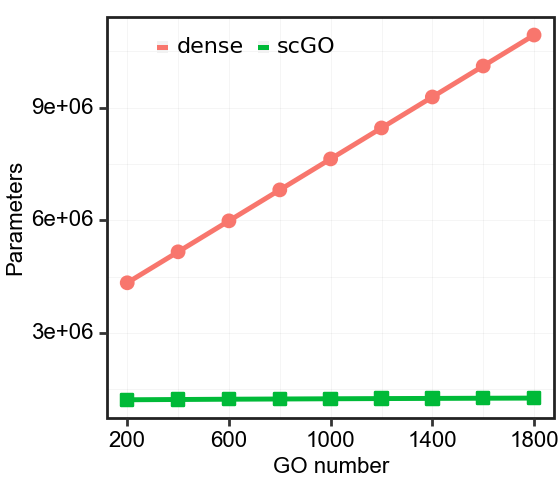

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.8 x 2.44 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/parameters_with_GO.pdf


In [73]:
from plotnine import *
import pandas as pd

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

x=[200,400,600,800,1000,1200,1400,1600,1800]
scGO=[1219661,1226748,1234154,1240193,1246323,1251401,1255899,1260443,1264380]
dense=[4334327,5158927,5983527,6808127,7632727,8457327,9281927,10106527,10931127]
data=pd.DataFrame({"x":x, "scGO":scGO,"dense":dense})

# Convert to long table format
data_long = pd.melt(data, id_vars=['x'], value_vars=['scGO', 'dense'], var_name='variable', value_name='value')


p=(ggplot()
    + geom_line(data_long,aes(x="x",y="value",group="variable",color='variable'),size=1)
    + geom_point(data,aes(x="x",y="scGO"),shape='s', size=2, color=c2) 
    #+ geom_line(data,aes(x="x",y="dense"),size=1)
    + geom_point(data,aes(x="x",y="dense"),shape='o', size=2, color=c1) 
    + labs(x='GO number', y='Parameters')
    + theme(
        figure_size=[1.4*2,1.22*2],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.05,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.05,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=8,alpha=0), #change legend title font size
        legend_text = element_text(size=8,alpha=1),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.45,0.93), 
        legend_key=element_rect(alpha=1),
        legend_key_size=4) #change legend text font size))
    + ylim([0,10931127])
    + scale_y_continuous(labels=lambda l: ["%.0e" % x for x in l])
    + scale_x_continuous(breaks=[200,600,1000,1400,1800],limits=(200,1800))
    + guides(color = guide_legend(title = "Probability cutoff"))
    + scale_color_manual(values=[c1,c2])
    
)
print(p)
p.save('figure/parameters_with_GO.pdf')

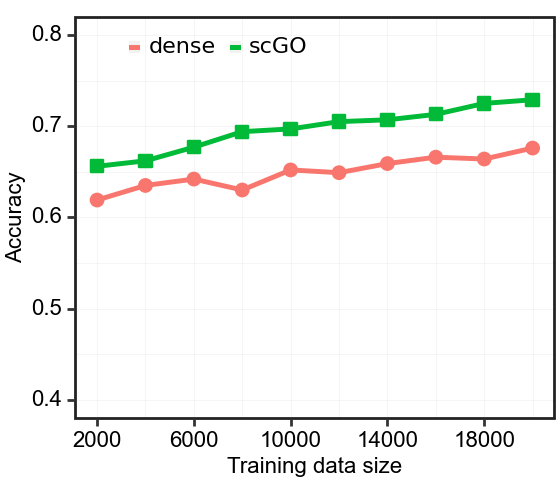

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.8 x 2.44 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/acc_scGO_vs_dense.pdf


In [4]:
from plotnine import *
import pandas as pd

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

training_size=[2000,4000,6000,8000,10000,12000,14000,16000,18000,20000]
scGO_acc=[0.656,0.662,0.677,0.694,0.697,0.705,0.707,0.713,0.725,0.729]
dense_acc=[0.619,0.635,0.642,0.630,0.652,0.649,0.659,0.666,0.664,0.676]

data=pd.DataFrame({"training_size":training_size, "scGO":scGO_acc,"dense":dense_acc})

# Convert to long table format
data_long = pd.melt(data, id_vars=['training_size'], value_vars=['scGO', 'dense'], var_name='variable', value_name='value')

p=(ggplot()
    + geom_line(data_long,aes(x="training_size",y="value",group="variable",color='variable'),size=1)
    + geom_point(data,aes(x="training_size",y="scGO"),shape='s', size=2, color=c2) 
    #+ geom_line(data,aes(x="x",y="dense"),size=1)
    + geom_point(data,aes(x="training_size",y="dense"),shape='o', size=2, color=c1) 
    + labs(x='Training data size', y='Accuracy')
    + theme(
        figure_size=[1.4*2,1.22*2],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.05,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.05,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=8,alpha=0), #change legend title font size
        legend_text = element_text(size=8,alpha=1),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.40,0.93), 
        legend_key=element_rect(alpha=1),
        legend_key_size=4) #change legend text font size))
    + ylim([0.4,0.8])
    #+ scale_y_continuous(labels=lambda l: ["%.0e" % x for x in l])
    + scale_x_continuous(breaks=[2000,6000,10000,14000,18000],limits=(2000,20000))
    + guides(color = guide_legend(title = "Probability cutoff"))
    + scale_color_manual(values=[c1,c2])
    
)
print(p)
p.save('figure/acc_scGO_vs_dense.pdf')

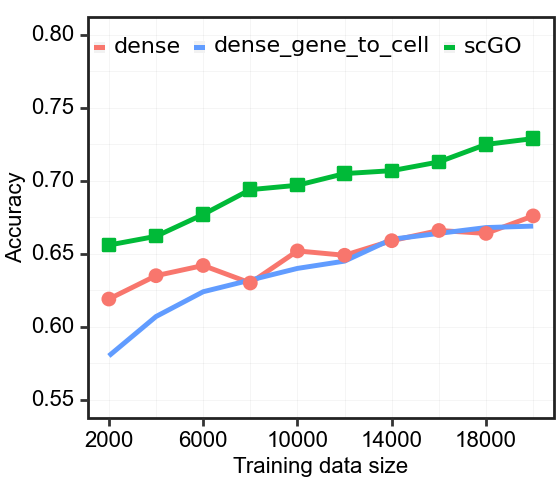

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.8 x 2.44 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/acc_scGO_vs_dense_2.pdf


In [3]:
from plotnine import *
import pandas as pd

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

training_size=[2000,4000,6000,8000,10000,12000,14000,16000,18000,20000]
scGO_acc=[0.656,0.662,0.677,0.694,0.697,0.705,0.707,0.713,0.725,0.729]
dense_acc=[0.619,0.635,0.642,0.630,0.652,0.649,0.659,0.666,0.664,0.676]

dense_gene_to_cell=[0.580,0.607,0.624,0.632,0.640,0.645,0.660,0.664,0.668,0.669]

data=pd.DataFrame({"training_size":training_size, "scGO":scGO_acc,"dense":dense_acc, "dense_gene_to_cell":dense_gene_to_cell})

# Convert to long table format
data_long = pd.melt(data, id_vars=['training_size'], value_vars=['scGO', 'dense','dense_gene_to_cell'], var_name='variable', value_name='value')

p=(ggplot()
    + geom_line(data_long,aes(x="training_size",y="value",group="variable",color='variable'),size=1)
    + geom_point(data,aes(x="training_size",y="scGO"),shape='s', size=2, color=c2) 
    #+ geom_line(data,aes(x="x",y="dense"),size=1)
    + geom_point(data,aes(x="training_size",y="dense"),shape='o', size=2, color=c1) 
    #+ geom_point(data,aes(x="training_size",y="dense_gene_to_cell"),shape='d', size=2, color=c3) 
    + labs(x='Training data size', y='Accuracy')
    + theme(
        figure_size=[1.4*2,1.22*2],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.05,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.05,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=8,alpha=0), #change legend title font size
        legend_text = element_text(size=8,alpha=1),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.55,0.93), 
        legend_key=element_rect(alpha=1),
        legend_key_size=4) #change legend text font size))
    + ylim([0.55,0.8])
    #+ scale_y_continuous(labels=lambda l: ["%.0e" % x for x in l])
    + scale_x_continuous(breaks=[2000,6000,10000,14000,18000],limits=(2000,20000))
    + guides(color = guide_legend(title = "Probability cutoff"))
    + scale_color_manual(values=[c1,c3,c2])
    
)
print(p)
p.save('figure/acc_scGO_vs_dense_2.pdf')

In [14]:
import psutil

# Get memory usage in bytes
memory_info = psutil.virtual_memory()
print(f"Total memory: {memory_info.total} bytes")
print(f"Available memory: {memory_info.available} bytes")
print(f"Used memory: {memory_info.used} bytes")
print(f"Memory usage percentage: {memory_info.percent}%")



Total memory: 134656249856 bytes
Available memory: 122204233728 bytes
Used memory: 11752067072 bytes
Memory usage percentage: 9.2%


In [ ]:
#running time per epoch 

#data pancreas data, Baron




In [ ]:
#memory usage during 